In [1]:
from astroquery.mast import Observations

# Example: TIC ID from TOI table
tic_id = "169904935"

# Search for TESS light curves
obs_table = Observations.query_criteria(
    obs_collection="TESS",
    target_name=tic_id,
    dataproduct_type="timeseries"
)

# Download the light curve files
products = Observations.get_product_list(obs_table)
manifest = Observations.download_products(
    products[products["productSubGroupDescription"] == "LC"],
    download_dir="tess_lightcurves"
)


INFO: Found cached file tess_lightcurves/mastDownload/TESS/tess2021014023720-s0034-0000000169904935-0204-s/tess2021014023720-s0034-0000000169904935-0204-s_lc.fits with expected size 1854720. [astroquery.query]


/home/dima/projects/nasa-challenge/.venv/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/tmp/ipykernel_2378077/1098268646.py:4: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  lc_file = search_lightcurvefile("TIC 169904935", mission="TESS").download()
/home/dima/projects/nasa-challenge/.venv/lib/python3.13/site-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 10 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/tmp/ipykernel_2378077/1098268646.py:7: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

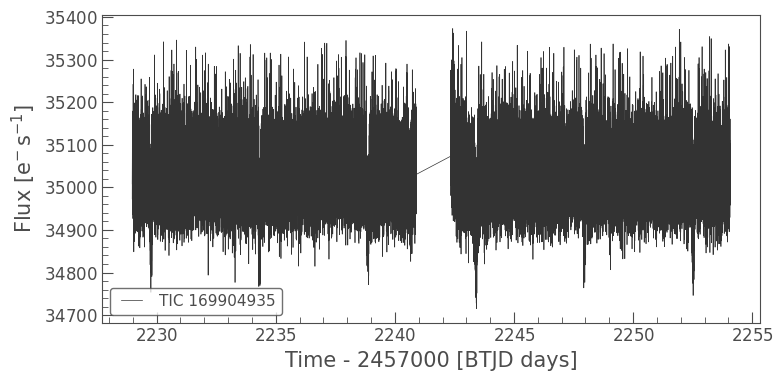

In [2]:
from lightkurve import search_lightcurvefile

# Search and download automatically
lc_file = search_lightcurvefile("TIC 169904935", mission="TESS").download()

# Load as LightCurve object
lc = lc_file.PDCSAP_FLUX  # Pre-search Data Conditioning light curve
lc = lc.remove_nans()

# View time series
lc.plot()


In [3]:
lc2 = lc.normalize().flatten(window_length=401)
lc2 = lc2.remove_outliers(sigma=5)


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

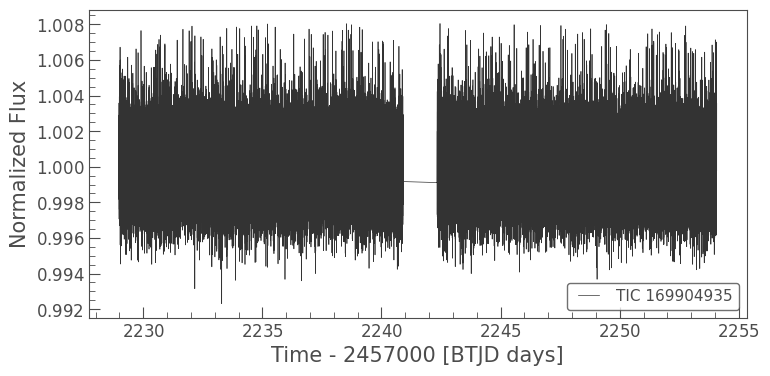

In [7]:
%matplotlib inline

lc2.plot()

In [ ]:
lc2.flux.value

MaskedNDArray([0.99921883, 1.00110064, 0.99881055, ..., 1.00273299,
               1.00357197, 0.99978787], shape=(101866,))

In [16]:
lc2.time.value[:300]

array([2228.97574864, 2228.97598012, 2228.97621161, 2228.97644309,
       2228.97667458, 2228.97690607, 2228.97713755, 2228.97736904,
       2228.97760053, 2228.97783201, 2228.9780635 , 2228.97829498,
       2228.97852647, 2228.97875796, 2228.97898944, 2228.97922093,
       2228.97945242, 2228.9796839 , 2228.97991539, 2228.98014688,
       2228.98037836, 2228.98060985, 2228.98084133, 2228.98107282,
       2228.98130431, 2228.98153579, 2228.98176728, 2228.98199877,
       2228.98223025, 2228.98246174, 2228.98269322, 2228.98292471,
       2228.9831562 , 2228.98338768, 2228.98361917, 2228.98385066,
       2228.98408214, 2228.98431363, 2228.98454511, 2228.9847766 ,
       2228.98500809, 2228.98523957, 2228.98547106, 2228.98570255,
       2228.98593403, 2228.98616552, 2228.986397  , 2228.98662849,
       2228.98685998, 2228.98709146, 2228.98732295, 2228.98755444,
       2228.98778592, 2228.98801741, 2228.98824889, 2228.98848038,
       2228.98871187, 2228.98894335, 2228.98917484, 2228.98940

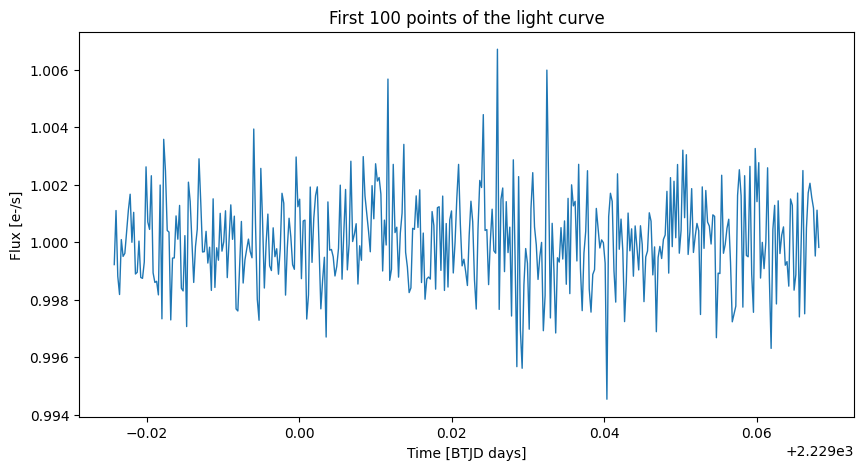

In [18]:
import matplotlib.pyplot as plt

# Extract first 100 samples
time_100 = lc2.time.value[:400]
flux_100 = lc2.flux.value[:400]

plt.figure(figsize=(10, 5))
plt.plot(time_100, flux_100, linewidth=1)
plt.xlabel("Time [BTJD days]")
plt.ylabel("Flux [e-/s]")
plt.title("First 100 points of the light curve")
plt.show()
